# 학생 성적 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train_df=pd.read_csv("/opt/ml/input/data/train_data.csv")
train_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


## 문제 풀이 수와 정답률의 상관관계

In [3]:
userID=pd.unique(train_df.userID).tolist()
print(userID[:5],userID[-5:])

[0, 1, 2, 5, 6] [7436, 7437, 7438, 7440, 7441]


In [4]:
user_ac=train_df.groupby("userID")["answerCode"].apply(list)
user_ac.head()

userID
0    [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, ...
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...
5    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...
6    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: answerCode, dtype: object

In [5]:
answer_rate_by_user=np.array(userID)
answer_rate_by_user=answer_rate_by_user[:, np.newaxis]
print(answer_rate_by_user[:5])

[[0]
 [1]
 [2]
 [5]
 [6]]


In [6]:
answer_rate_by_user=answer_rate_by_user.tolist()

for u in range(len(user_ac)):
    answer_rate_by_user[u].append(sum(user_ac[userID[u]])/len(user_ac[userID[u]]))
    answer_rate_by_user[u].append(len(user_ac[userID[u]]))
print(answer_rate_by_user[:10])


[[0, 0.6308724832214765, 745], [1, 0.8531618435155413, 933], [2, 0.6123188405797102, 276], [5, 0.7959183673469388, 833], [6, 0.44299674267100975, 921], [7, 0.6071428571428571, 812], [8, 0.6417910447761194, 536], [9, 0.6816608996539792, 867], [10, 0.8513513513513513, 370], [11, 0.49421487603305786, 605]]


In [7]:
answer_rate_by_user_df=pd.DataFrame(data=answer_rate_by_user, index=userID, columns=['userID','answerRate','문제풀이수'])
answer_rate_by_user_df.head(5)

,userID,answerRate,문제풀이수
0,0,0.630872,745
1,1,0.853162,933
2,2,0.612319,276
5,5,0.795918,833
6,6,0.442997,921


In [27]:
print('평균정답률 : ',answer_rate_by_user_df.mean(axis=0).answerRate)
print('평균 문제풀이수 : ',answer_rate_by_user_df.mean(axis=0)['문제풀이수'])

평균정답률 :  0.628909126276663
평균 문제풀이수 :  338.39743206927443


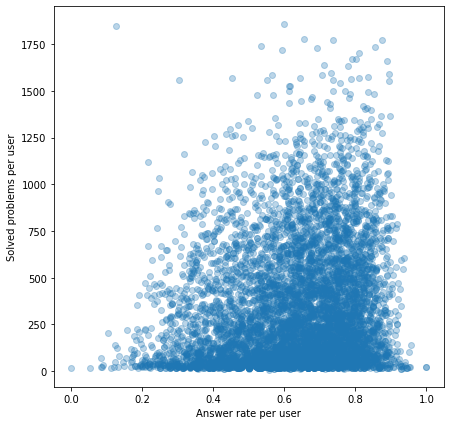

In [28]:
fig = plt.figure(figsize=(7, 7))
plt.rcParams["font.family"] = "NanumSquare"
plt.scatter(answer_rate_by_user_df['answerRate'],answer_rate_by_user_df['문제풀이수'], alpha=0.3)
plt.xlabel('Answer rate per user')
plt.ylabel('Solved problems per user')
plt.show()


## 시간대별 정답률

In [43]:
user_hour=train_df.copy()

time=list()
for i in range(len(user_hour)): # 52초 소요
    time.append(int(user_hour.iloc[i,4].split(' ')[1].split(':')[0]))

user_hour['time']=time
user_hour.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,time
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,0


In [44]:
user_hour=user_hour.groupby("time")["answerCode"].apply(list)
user_hour_df=pd.DataFrame(data=user_hour)
user_hour_df['answerRate']=0
user_hour_df[:5]

,answerCode,answerRate
time,,
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...",0
1,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...",0
2,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, ...",0
3,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
4,"[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0


In [49]:
for h in range(len(user_hour_df)):
    user_hour_df.loc[h,'answerRate']=sum(user_hour_df.loc[h,'answerCode'])/len(user_hour_df.loc[h,'answerCode'])
user_hour_df.head()

,answerCode,answerRate
time,,
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...",0.649446
1,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...",0.644321
2,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, ...",0.642410
3,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.632685
4,"[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.633292


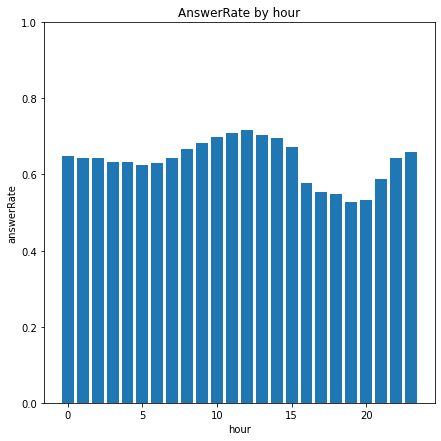

In [58]:
plt.figure(figsize=(7, 7))
plt.bar(user_hour_df.index,user_hour_df['answerRate'])
plt.ylim(0,1)
plt.xlabel('hour')
plt.ylabel('answerRate')
plt.title('AnswerRate by hour')
plt.show()

## 활동 기간에 대한 학생별 성적

In [60]:
period=train_df.copy()
period=period.drop(columns=['assessmentItemID','testId','KnowledgeTag','answerCode'])

period['Year']=0
period['Month']=0
period['Day']=0
answer_rate_by_user_df['Period_days']=0


for i in range(len(period)): # 8분 소요
    tmp=period.loc[i,'Timestamp'].split(' ')[0].split('-')

    period.loc[i,'Year']=int(tmp[0])
    period.loc[i,'Month']=int(tmp[1])
    period.loc[i,'Day']=int(tmp[2])

period.head()

,userID,Timestamp,Year,Month,Day,Period_days
0,0,2020-03-24 00:17:11,2020,03,24,0
1,0,2020-03-24 00:17:14,2020,03,24,0
2,0,2020-03-24 00:17:22,2020,03,24,0
3,0,2020-03-24 00:17:29,2020,03,24,0
4,0,2020-03-24 00:17:36,2020,03,24,0


In [64]:
period.sample(5)

,userID,Timestamp,Year,Month,Day
1269235,2026,2020-08-03 03:16:15,2020,08,03
1764326,3243,2020-09-08 10:53:52,2020,09,08
784491,1138,2020-01-17 11:11:39,2020,01,17
231980,311,2020-10-22 05:30:35,2020,10,22
1862022,3587,2020-10-21 13:10:09,2020,10,21


In [68]:
period['Year']=period['Year'].astype(int)
period['Month']=period['Month'].astype(int)
period['Day']=period['Day'].astype(int)

In [100]:
period_days=list()

for u in userID: # 20초 소요
    u_df=period[period['userID']==u]
    last=datetime(u_df.iloc[-1,2],u_df.iloc[-1,3],u_df.iloc[-1,4])
    first=datetime(u_df.iloc[0,2],u_df.iloc[0,3],u_df.iloc[0,4])
    answer_rate_by_user_df.loc[u,'Period_days']=last-first

In [107]:
def days(x):
    return x.days
    
answer_rate_by_user_df['Period_days']=answer_rate_by_user_df['Period_days'].apply(days)
print('공부기간이 가장 긴 학생의 공부 일 : ',max( answer_rate_by_user_df['Period_days']))
print('공부기간이 가장 짧은 학생의 공부 일 : ', min( answer_rate_by_user_df['Period_days']))

answer_rate_by_user_df.head()

공부기간이 가장 긴 학생의 공부 일 :  363
공부기간이 가장 짧은 학생의 공부 일 :  1


,userID,answerRate,문제풀이수,Period_days
0,0,0.630872,745,274
1,1,0.853162,933,312
2,2,0.612319,276,284
5,5,0.795918,833,303
6,6,0.442997,921,231


In [132]:
answer_rate_by_user_df['Period_month']=answer_rate_by_user_df['Period_days'] // 28 # 한 달을 28일 이라고 하자
grouped_user_month=answer_rate_by_user_df.groupby("Period_month")["userID"].apply(list)
grouped_user_month=pd.DataFrame(data=grouped_user_month)
grouped_user_month['mean_answerRate']=0

grouped_answerRate_month=answer_rate_by_user_df.groupby("Period_month")["answerRate"].apply(list)

for i in range(len(grouped_user_month)):
    grouped_user_month.loc[i,'mean_answerRate']=sum(grouped_answerRate_month[i]) / len(grouped_answerRate_month[i])
grouped_user_month

113
[113, 232, 441, 415, 393, 403, 455, 707, 1308, 823, 972, 274, 162]
Period_month
0     [0.78125, 0.8433734939759037, 0.7, 0.797752808...
1     [0.6590909090909091, 0.6808510638297872, 0.525...
2     [0.7763975155279503, 0.7559808612440191, 0.761...
3     [0.8482142857142857, 0.828996282527881, 0.7340...
4     [0.5911458333333334, 0.6651234567901234, 0.775...
5     [0.650887573964497, 0.8240740740740741, 0.5560...
6     [0.7864583333333334, 0.680998613037448, 0.6565...
7     [0.49421487603305786, 0.7637292464878672, 0.81...
8     [0.44299674267100975, 0.8513513513513513, 0.51...
9     [0.6308724832214765, 0.8543046357615894, 0.728...
10    [0.6123188405797102, 0.7959183673469388, 0.607...
11    [0.8531618435155413, 0.6417910447761194, 0.671...
12    [0.6816608996539792, 0.8945337620578778, 0.831...
Name: answerRate, dtype: object


,userID,mean_answerRate
Period_month,,
0,"[2589, 4457, 4699, 4711, 4718, 4980, 5139, 518...",0.627150
1,"[1633, 1650, 1738, 1964, 3026, 3265, 3485, 350...",0.624628
2,"[1388, 1537, 1782, 1925, 1975, 2054, 2066, 229...",0.627390
3,"[280, 700, 731, 836, 906, 980, 1092, 1107, 121...",0.611169
4,"[72, 105, 121, 228, 889, 946, 998, 1261, 1350,...",0.607124
5,"[123, 179, 320, 603, 672, 695, 773, 774, 870, ...",0.622066
6,"[62, 211, 227, 281, 367, 425, 614, 654, 664, 7...",0.614383
7,"[11, 18, 38, 47, 56, 65, 73, 91, 140, 143, 167...",0.622632
8,"[6, 10, 14, 16, 20, 27, 28, 37, 41, 42, 43, 49...",0.648019


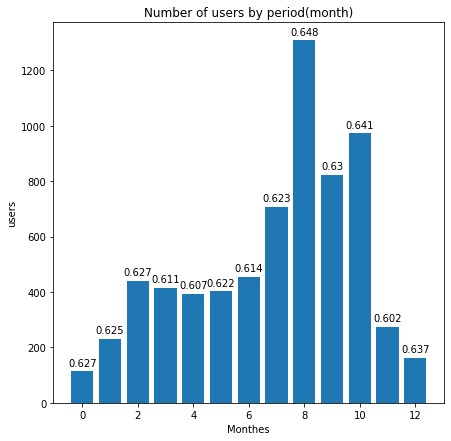

In [152]:
plt.figure(figsize=(7,7))
y=[len(grouped_user_month.loc[i,'userID']) for i in range(len(grouped_user_month))]
plt.bar(grouped_user_month.index,y)
plt.xlabel('Monthes')
plt.ylabel('users')
plt.title('Number of users by period(month)')

def add_value_label(x_list,y_list,mean):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]+20,mean[i], ha="center") #20은 막대와 숫자와의 간격을 위해서

add_value_label(grouped_user_month.index,y, round(grouped_user_month['mean_answerRate'],3))

plt.show()

# Outlier 제거

## 정답률 극히 크거나 작은 유저

In [170]:
print('정답률 0.1 이하인 유저 수',len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.1]))
print('정답률 0.1 이하인 유저들이 푼 문제 수 평균', sum(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.1].문제풀이수)/len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.1].문제풀이수))
print('정답률 0.2 이하인 유저 수',len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.2]))
print('정답률 0.2 이하인 유저들이 푼 문제 수 평균', sum(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.2].문제풀이수)/len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.2].문제풀이수))
print('정답률 0.3 이하인 유저 수',len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.3]))
print('정답률 0.3 이하인 유저들이 푼 문제 수 평균', sum(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.3].문제풀이수)/len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.3].문제풀이수))
print('정답률 0.9 이상인 유저 수',len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']>=0.9]))
print('정답률 0.9 이상인 유저들이 푼 문제 수 평균', sum(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']>=0.9].문제풀이수)/len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']>=0.9].문제풀이수))
print('정답률 0.95 이상인 유저 수',len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']>=0.95]))
print('정답률 0.95 이상인 유저들이 푼 문제 수 평균', sum(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']>=0.95].문제풀이수)/len(answer_rate_by_user_df[answer_rate_by_user_df['answerRate']>=0.95].문제풀이수))

정답률 0.1 이하인 유저 수 6
정답률 0.1 이하인 유저들이 푼 문제 수 평균 31.333333333333332
정답률 0.2 이하인 유저 수 47
정답률 0.2 이하인 유저들이 푼 문제 수 평균 127.23404255319149
정답률 0.3 이하인 유저 수 235
정답률 0.3 이하인 유저들이 푼 문제 수 평균 179.68510638297872
정답률 0.9 이상인 유저 수 59
정답률 0.9 이상인 유저들이 푼 문제 수 평균 241.47457627118644
정답률 0.95 이상인 유저 수 6
정답률 0.95 이상인 유저들이 푼 문제 수 평균 54.5


In [194]:
under_outlier=answer_rate_by_user_df[answer_rate_by_user_df['answerRate']<=0.1].userID.to_list()
over_outlier =answer_rate_by_user_df[answer_rate_by_user_df['answerRate']>=0.95].userID.to_list()
poor_grade=answer_rate_by_user_df[(answer_rate_by_user_df['문제풀이수']>1750) & (answer_rate_by_user_df['answerRate']<0.2)].userID.to_list()
outlier_userID_list=under_outlier+over_outlier+poor_grade
print("제거해야할 user ID들",outlier_userID_list)

제거해야할 user ID들 [5887, 6283, 6382, 6764, 7029, 7166, 5498, 5820, 6760, 6988, 7171, 7186, 481]


## 문제풀이수가 너무 적은 user

<AxesSubplot:>

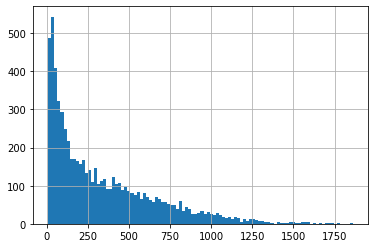

In [13]:
answer_rate_by_user_df['문제풀이수'].hist(bins=100)

In [12]:
for i in range(10,100,10):
    print(f'문제 풀이수가 {i}개 이하인 유저 수 : ',len(answer_rate_by_user_df[answer_rate_by_user_df['문제풀이수']<=i]))

문제 풀이수가 10개 이하인 유저 수 :  1
문제 풀이수가 20개 이하인 유저 수 :  256
문제 풀이수가 30개 이하인 유저 수 :  594
문제 풀이수가 40개 이하인 유저 수 :  864
문제 풀이수가 50개 이하인 유저 수 :  1126
문제 풀이수가 60개 이하인 유저 수 :  1355
문제 풀이수가 70개 이하인 유저 수 :  1548
문제 풀이수가 80개 이하인 유저 수 :  1711
문제 풀이수가 90개 이하인 유저 수 :  1874


In [21]:
small_problem_userID=answer_rate_by_user_df[answer_rate_by_user_df['문제풀이수']<=30].userID.tolist()
small_problem_userID[:5] # -> preprocessing/train_small_problem.pyu

[4610,
 4752,
 5188,
 5258,
 5354,
 5361,
 5425,
 5461,
 5488,
 5509,
 5512,
 5558,
 5563,
 5662,
 5684,
 5786,
 5791,
 5817,
 5839,
 5910,
 5936,
 5937,
 5944,
 5987,
 6022,
 6043,
 6090,
 6103,
 6105,
 6106,
 6117,
 6140,
 6145,
 6171,
 6181,
 6182,
 6186,
 6189,
 6195,
 6232,
 6233,
 6247,
 6249,
 6259,
 6271,
 6272,
 6283,
 6285,
 6293,
 6299,
 6302,
 6315,
 6323,
 6346,
 6348,
 6350,
 6353,
 6354,
 6370,
 6374,
 6379,
 6383,
 6386,
 6387,
 6393,
 6408,
 6411,
 6414,
 6422,
 6425,
 6432,
 6443,
 6452,
 6455,
 6460,
 6464,
 6466,
 6470,
 6491,
 6504,
 6508,
 6510,
 6511,
 6519,
 6523,
 6527,
 6529,
 6532,
 6533,
 6540,
 6555,
 6560,
 6567,
 6572,
 6574,
 6579,
 6583,
 6587,
 6593,
 6602,
 6603,
 6610,
 6612,
 6618,
 6622,
 6624,
 6625,
 6633,
 6634,
 6638,
 6642,
 6643,
 6644,
 6648,
 6650,
 6652,
 6654,
 6658,
 6663,
 6670,
 6675,
 6680,
 6682,
 6686,
 6687,
 6691,
 6692,
 6694,
 6695,
 6696,
 6706,
 6708,
 6716,
 6717,
 6722,
 6724,
 6726,
 6735,
 6737,
 6740,
 6741,
 6743,
 6749,